In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 102MB/s] 
100% 1.06G/1.06G [00:10<00:00, 105MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [94]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [95]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [96]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [98]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1153 - accuracy: 0.9539 - val_loss: 1.2953 - val_accuracy: 0.6988
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.0901 - accuracy: 0.9646 - val_loss: 0.6474 - val_accuracy: 0.7956
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0792 - accuracy: 0.9689 - val_loss: 0.6788 - val_accuracy: 0.8320
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0727 - accuracy: 0.9717 - val_loss: 0.9876 - val_accuracy: 0.6388
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0664 - accuracy: 0.9737 - val_loss: 0.6748 - val_accuracy: 0.8394
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0632 - accuracy: 0.9754 - val_loss: 1.1955 - val_accuracy: 0.7354
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0749 - accuracy: 0.9719 - val_loss: 0.8612 - val_ac

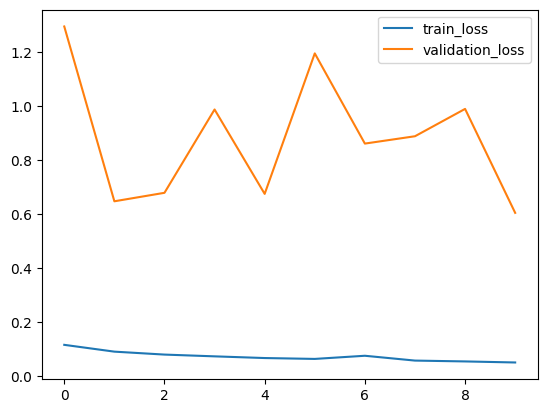

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

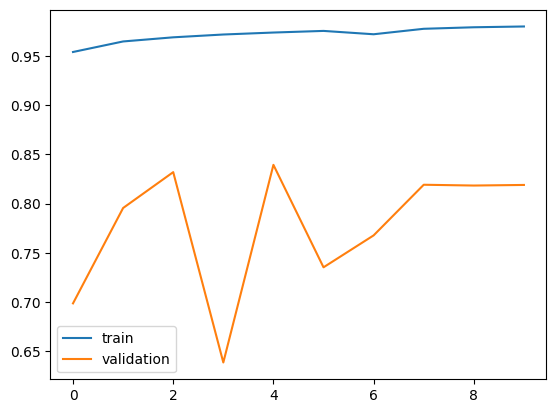

In [113]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

In [105]:
import cv2
test_img=cv2.imread('/content/fda21db0ec5eb0a84f36b095dff65cf7.jpg')

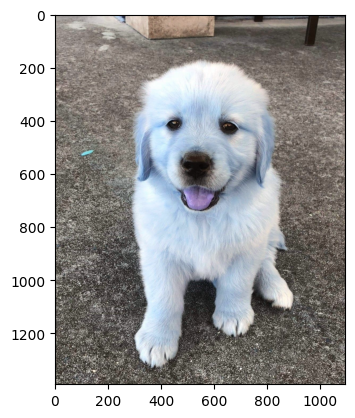

In [106]:
plt.imshow(test_img)

In [107]:
test_img.shape

(1392, 1093, 3)

In [108]:
test_img=cv2.resize(test_img,(256,256))

In [84]:
test_input=test_img.reshape((1,256,256,3))

In [115]:
pred=model.predict(test_input)

1/1 [==============================] - 0s 65ms/step


In [116]:
if pred[0][0]>=0.7:
  print("Dog")
elif pred[0][0]<=0.6:
  print("cat")

Dog


In [75]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("model_weights.h5")

In [76]:
from google.colab import files

files.download("model.json")
files.download("model_weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>